### Assessing the Readiness of HEI in Malaysia to Accept Generation Alpha

---

# Data Exploration

![orange-divider](https://user-images.githubusercontent.com/7065401/92672455-187a5f80-f2ef-11ea-890c-40be9474f7b7.png)

## Info Content

This notebook provides the in depth analysis on the student performance in exams at public schools.

**Info_Content.csv**

The content in Junyi Academy contains exercises, videos, and exams.
All the content in this dataset is in the type of exercise.

An exercise is a basic unit for students to learn a certain concept.
There are multiple problems in a single exercise that all relate to a certain concept.

This table records the metadata and hierarchy structure of each exercise in Junyi Academy.
There are three difficulty settings for each content, which indicates how hard it is to learn the concept.
The learning stage is separated into three stages: Elementary, Junior, and Senior.

The exercises in Junyi Academy are organized in a tree-like structure.
The current dataset release has four levels in the hierarchy.

| Variable Name | Description |
|:-|:-|
| ucid | The hashed unique ID of the content. |
| content_pretty_name | The Chinese display name of this content. |
| content_kind | The kind of this content. The current dataset release only includes `Exercise` |
| difficulty | The difficulty of this content. There are four possible values: `Easy`, `Normal`, `Hard` and `Unset`. Unset means |
| learning stage | The subject of this content. The current dataset release only includes `math` |
| subject | The learning stage of this content. There are three possible values: `Elementary`, `Junior` and `Senior`. |
| level1_id | The hashed level 1 layer ID of this content. The levels form the tree-like hierarchy structure of contents in Junyi |
| level2_id | The hashed level 2 layer ID of this content. The levels form the tree-like hierarchy structure of contents in Junyi |
| level3_id | The hashed level 3 layer ID of this content. The levels form the tree-like hierarchy structure of contents in Junyi |
| level4_id | The hashed level 4 layer ID of this content. The levels form the tree-like hierarchy structure of contents in Junyi |

## Importing libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style='whitegrid')
sns.set_color_codes('pastel')

## Loading data

In [3]:
%%time
info_content_raw_df = pd.read_csv('../data/raw/Info_Content.csv', index_col='ucid')

Wall time: 28.9 ms


## Exporing data

Let’s have a look at data dimensionality, feature names, and feature types.

In [4]:
info_content_raw_df.shape

(1330, 9)

In [6]:
# Returns different datatypes for each columns (float, int, string, bool, etc.)
info_content_raw_df.dtypes

content_pretty_name    object
content_kind           object
difficulty             object
subject                object
learning_stage         object
level1_id              object
level2_id              object
level3_id              object
level4_id              object
dtype: object

Returns the first x number of rows when head(x). Without a number it returns 5

In [4]:
# Reading the info content dataset
info_content_raw_df.head()

,content_pretty_name,content_kind,difficulty,subject,learning_stage,level1_id,level2_id,level3_id,level4_id
ucid,,,,,,,,,
odIwFdIiecFwVUAEEV40K3MSuCSlIZkbq92Zp9tkZq8=,【基礎】怎樣解題：數量關係,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
dfeeBaa8zDhWS6nu7zeXKwLyi4zqEajI3tJM9/fSBPM=,【基礎】和差問題 1,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
C2AT0OBTUn+PRxEVd39enhW/DJtka1Tk90DUAR6yVdA=,【基礎】雞兔問題 1,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
jZvYpEa6VB/WrlKKmQHnfbv/xJ4OypBzq0epVcn500Q=,【基礎】年齡問題 1,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
M+UxJPgRIW57a0YS3eik8A9YDj+AwaMpTa5yWYn/kAw=,【基礎】追趕問題,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=


In [7]:
# Reading the info content dataset
info_content_raw_df.tail()

,content_pretty_name,content_kind,difficulty,subject,learning_stage,level1_id,level2_id,level3_id,level4_id
ucid,,,,,,,,,
NPkrCjbLK35wefMCv6y6XMO5eYO/gthS6LGwrdjG2OQ=,【進階】平方公分綜合習題,Exercise,hard,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,8OFhw5s0EmQIKBlKbJL+Dvp+u3ss4rN3foLwLM4xXls=,JtYpwXqNWwRqPrXYh0JhE2lEEUI1gKRPdDH3jYwhqMo=
3xqxJN2W+KEo3SBjh7HnXpGjB4ewSbm1j/18fCn05yc=,【進階】周長與面積綜合習題,Exercise,hard,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,8OFhw5s0EmQIKBlKbJL+Dvp+u3ss4rN3foLwLM4xXls=,Ny1/uHUXA4pvWVN1nVWv+vsdaQde7StyoQV8HAyJD80=
j4rGpwpqhLE9foelXD2yjokS0u3QR+ULhNqLGeF/4sk=,【一般】平方公分綜合習題,Exercise,normal,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,8OFhw5s0EmQIKBlKbJL+Dvp+u3ss4rN3foLwLM4xXls=,JtYpwXqNWwRqPrXYh0JhE2lEEUI1gKRPdDH3jYwhqMo=
W4l0TIo0YQXLT/c8/Uy7OLtElmNuNWPODI7HkJ0NaI0=,【一般】周長與面積綜合習題,Exercise,normal,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,8OFhw5s0EmQIKBlKbJL+Dvp+u3ss4rN3foLwLM4xXls=,Ny1/uHUXA4pvWVN1nVWv+vsdaQde7StyoQV8HAyJD80=
gvez7GFXUbuQl27U5+p/4QwFZZyXP2QFYQdoor8ZkeE=,【一般】周長與面積的應用,Exercise,normal,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,8OFhw5s0EmQIKBlKbJL+Dvp+u3ss4rN3foLwLM4xXls=,Ny1/uHUXA4pvWVN1nVWv+vsdaQde7StyoQV8HAyJD80=


From the output, we can see that the table contains 1330 rows and 9 columns.

Now let's try printing out column names using columns:

Returns number of rows and columns of the dataset

In [8]:
# Returns true for a column having null values, else false
info_content_raw_df.isnull().any()

content_pretty_name    False
content_kind           False
difficulty             False
subject                False
learning_stage         False
level1_id              False
level2_id              False
level3_id              False
level4_id              False
dtype: bool

In [9]:
# Returns basic information on all columns
info_content_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1330 entries, odIwFdIiecFwVUAEEV40K3MSuCSlIZkbq92Zp9tkZq8= to gvez7GFXUbuQl27U5+p/4QwFZZyXP2QFYQdoor8ZkeE=
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   content_pretty_name  1330 non-null   object
 1   content_kind         1330 non-null   object
 2   difficulty           1330 non-null   object
 3   subject              1330 non-null   object
 4   learning_stage       1330 non-null   object
 5   level1_id            1330 non-null   object
 6   level2_id            1330 non-null   object
 7   level3_id            1330 non-null   object
 8   level4_id            1330 non-null   object
dtypes: object(9)
memory usage: 103.9+ KB


object is the data types of our features. With this same method, we can easily see if there are any missing values. Here, there are none because each column contains 1330 observations, the same number of rows we saw before with shape.

In [11]:
# Returns basic statistics on numeric columns
info_content_raw_df.describe().T

,count,unique,top,freq
content_pretty_name,1330,1320,【基礎】相等的比,2
content_kind,1330,1,Exercise,1330
difficulty,1330,4,easy,835
subject,1330,1,math,1330
learning_stage,1330,3,elementary,784
level1_id,1330,1,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,1330
level2_id,1330,10,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,553
level3_id,1330,42,scsWmkZsfmdmD2IzB24sQ1Au1BOXYgQEx9zO3+4glq8=,146
level4_id,1330,171,364ml6jwsO0pO5l86JBpC+KFYvYr7mn7S9gVuhoBnUE=,18


## Data Visualization

### Categorical Data

For categorical (type object) feature we can use the value_counts method. Let's have a look at the distribution of Churn:

In [24]:
info_content_raw_df['content_pretty_name'].value_counts()

【基礎】質數與合數            2
【基礎】相等的比             2
【基礎】數量問題             2
【基礎】因數與倍數            2
【基礎】在數線上標示分數         2
                    ..
【進階】帶分數與假分數綜合習題      1
【基礎】弦切角              1
【一般】最大公因數的應用         1
【基礎】代數式的值            1
【基礎】利用標準分解式求最大公因數    1
Name: content_pretty_name, Length: 1320, dtype: int64

Some content_pretty_name has the frequency of 2.

In [13]:
info_content_raw_df['content_kind'].value_counts()

Exercise    1330
Name: content_kind, dtype: int64

Text(0.5, 1.0, 'content_kind distribution')

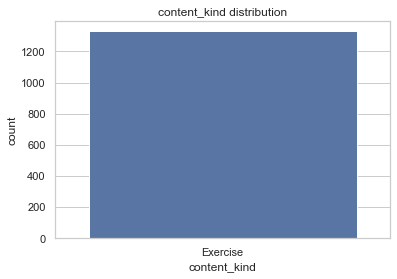

In [34]:
sns.countplot(info_content_raw_df['content_kind']).set_title('content_kind distribution')

1330 records are the kind of exercise. The current dataset release only includes `Exercise`. The `content_kind` column can be drop since all rows have the same values.

In [16]:
info_content_raw_df['difficulty'].value_counts()

easy      835
normal    305
hard      149
unset      41
Name: difficulty, dtype: int64

Text(0.5, 1.0, 'difficulty distribution')

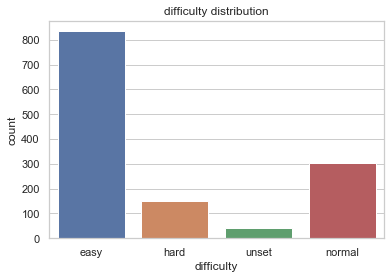

In [35]:
sns.countplot(info_content_raw_df['difficulty']).set_title('difficulty distribution')

835 problems are easy, 305 problems are normal, 149 problems are hard difficulty and 41 problems are unset.

In [12]:
info_content_raw_df['subject'].value_counts()

math    1330
Name: subject, dtype: int64

Text(0.5, 1.0, 'subject distribution')

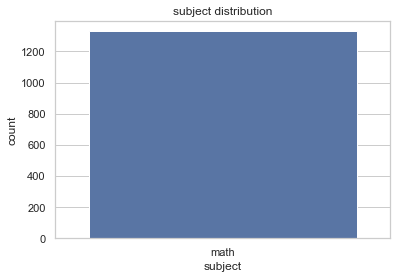

In [36]:
sns.countplot(info_content_raw_df['subject']).set_title('subject distribution')

The subject of all 1330 content records are `math`. The current dataset release only includes `math`.

In [13]:
info_content_raw_df['learning_stage'].value_counts()

elementary    784
junior        543
senior          3
Name: learning_stage, dtype: int64

Text(0.5, 1.0, 'learning_stage distribution')

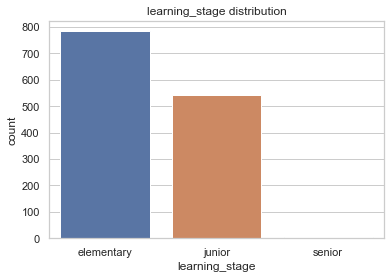

In [37]:
sns.countplot(info_content_raw_df['learning_stage']).set_title('learning_stage distribution')

There are 784 problems are elementary learning stage, 543 problems are junior learning stage and 3 problems are senior stage.

In [14]:
info_content_raw_df['level1_id'].value_counts()

aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=    1330
Name: level1_id, dtype: int64

Text(0.5, 1.0, 'level1_id distribution')

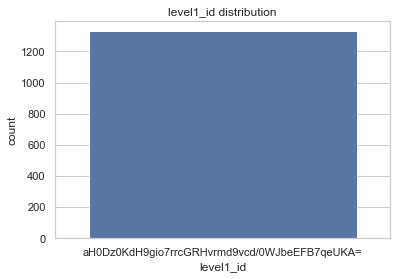

In [38]:
sns.countplot(info_content_raw_df['level1_id']).set_title('level1_id distribution')

In [15]:
info_content_raw_df['level2_id'].value_counts()

7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=    553
R81Sqc8LAYj8amTPwFRvoPgbGpdaZoQLNX0hTg0DMB4=    224
xYDz4OEv0xsri1IpmXlrgMLJ848rgySf+39xWpq4DBI=    162
MfUX4BrIuFzJjm97tCQVisXbonyvtYtwCUJo6JpmoyU=    136
1EzKLzTq9Ax8/wlR9cJNrtthvk9lBi/SFdx/4L1PIaE=    115
ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=    100
2YwsqJH0U7Zguyun1OaStQsIHbUoYvgJNK0QCGC5BQI=     21
jXSXg7CfDboPEXlnqJTGuQOb0VIgOXCpaU/Sl+/m3n0=     16
5Np4fxxPeBgmNpeEOcXqarZIVsOEzZ1fSssL8cytQAc=      2
rzRcsBurW8jbUhivGAdZozPksRAZ5xM898ohJEBg93g=      1
Name: level2_id, dtype: int64

Text(0.5, 1.0, 'level2_id distribution')

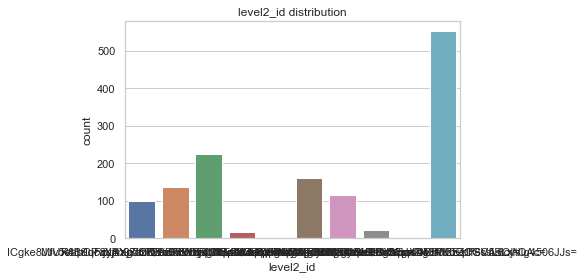

In [39]:
sns.countplot(info_content_raw_df['level2_id']).set_title('level2_id distribution')

In [16]:
info_content_raw_df['level3_id'].value_counts()

scsWmkZsfmdmD2IzB24sQ1Au1BOXYgQEx9zO3+4glq8=    146
zM75Dhur9om41RTSUIivWvZ07gckl2Hi0cd3/Kx4sN4=    132
YM8uggtD5HZBGCCzNJLU90fC9C+B8/bZP3x483rb7PI=     97
4cISKCt3nXWe4r6Q8bzjOiL2EYYsZyT6Z0mNNJckqEc=     84
nLqsiSA2CPPgbpIk8GE3OSF94E4F7ogLig3ETQnOw4g=     78
CFq991L5i+mxDSbH+06jz+rWPf+FmW8hT4uxQjzwxpM=     49
/yqeM1FRP1rB9WuQWBkStMqrBQgjEexaeyWIhBC7ov4=     43
Dnl0P09LJllOG2eS2nB9pQax0ZixH7aCXPTKjB6O/dg=     37
xJYDWrjKoWhvx5w88UZja7WZgWHm2o9jmUQR8V911qc=     37
adBGt1t/h6kVwnNoQ/bmRj5KcQLWM8NKNR9HeqJy9ZA=     37
ItasYR+er/FlZlRvL66/NB3wY0AvmlrZKoqe4gmPyD0=     34
mS7VsK5w8e8Fw12vi9+tqcFfvw+I2J9+ot6NAMLgGno=     34
t9kdlRkqrUJUBY1Ill0Lt1UDYGQG08slJLdM3z+3to4=     34
APMXggE9pI1fpPhZYSwqSQGw/eQmPpLFBY7s9oBPWIk=     31
X5gAB0OLUqA8Rp3qGLuJyf6kyY16/nSreFkh68gpFzc=     31
a2w4FdOiBsy7t1fsstano3rtWKyay8qPhPd4U6Er7YQ=     27
hnFTwzVTapuqt9dsYhFFSgSgU0i7cBjbx0itZHp3gXw=     26
bnTxSNli6FmYFjFpnuPi5RDuC2L3MsoN4XIz7sdfdvI=     26
sl7IabghdxfoS9yuKX/dLgRCIZfVrkT6fO1pbXV30cI=     24
1B4NV31TSyP4

Text(0.5, 1.0, 'level3_id distribution')

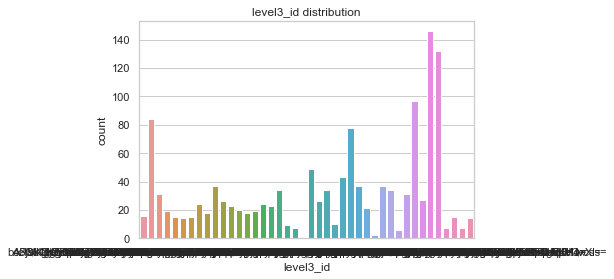

In [40]:
sns.countplot(info_content_raw_df['level3_id']).set_title('level3_id distribution')

In [17]:
info_content_raw_df['level4_id'].value_counts()

364ml6jwsO0pO5l86JBpC+KFYvYr7mn7S9gVuhoBnUE=    18
FpQ/ONFxc3KG9UipcD2MZd0AB2A4C4QihnPIu1ilshs=    16
B7VcZ+GXaXxwo0f9JJv1LLU2KkDNcrDt2cL6+KwnfrA=    16
hq6uCe9NmtCc+0wlbGGIsxegP2cqYAdFebGd+v4/o8Q=    15
SoFA3oYx02KwW6utJm+Op0W9ZI/wGVzDyVDAAZRiRng=    15
                                                ..
UgkV1PV2Qm1SUXkTKRK7ojztDA68vDv33Vg2mv+oWa0=     2
18hZrFpMhRCzG1ntJLj9spv2bCK65XhZBR1+fdEQMaQ=     1
k9h8WnipCeqQzCoBIlopbBZspaDYdQKbtmsv18qlUZM=     1
zyVjBuMRkEs/hVTbayt34VrOAU1KNtk5Tt0EvU+/xhk=     1
du5oJdoBN5kRI9HOeBz42j8tba4SuHf0PmdkaF97Nlg=     1
Name: level4_id, Length: 171, dtype: int64

Text(0.5, 1.0, 'level4_id distribution')

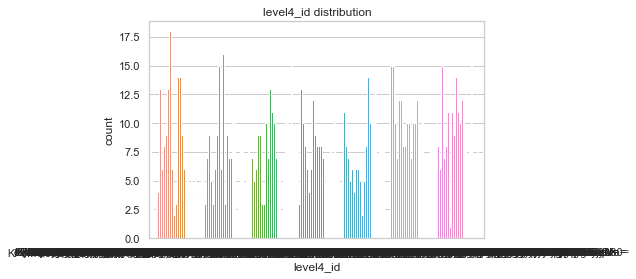

In [41]:
sns.countplot(info_content_raw_df['level4_id']).set_title('level4_id distribution')